# **How HTML Interacts with PHP**

# **1. What Does This Mean?**

🔹 HTML and PHP work together to create dynamic web pages.
🔹 HTML is a markup language used for structuring web pages.
🔹 PHP is a server-side scripting language used to process data and generate dynamic content.



# **2. Why is Interaction Required?**

✔ HTML alone is static – It cannot process forms, interact with databases, or handle logic.

✔ PHP makes websites dynamic – It processes user input, fetches data, and customizes web pages.

✔ Together, HTML & PHP create interactive websites – Like login systems, shopping carts, and contact forms.

# **3. Request Types (GET & POST Methods)**

HTML interacts with PHP mainly through forms using GET and POST requests.

**✅ GET Method**

Sends data via URL parameters.

Good for search queries or when sharing links.

# **Example:**

**process.php**



```
<?php
echo "Hello, " . $_GET['name'];
?>

```





```
<form action="process.php" method="GET">
    Name: <input type="text" name="name">
    <input type="submit" value="Submit">
</form>

```



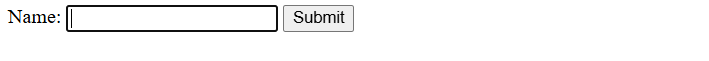

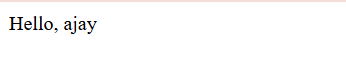

url example: http://localhost/php%20tutorial/process.php?name=ajay

# **✅ POST Method**

Sends data securely (not visible in URL).

Used for logins, forms, and sensitive data.

**Example:**

**PHP to handle it (process.php):**



```
<?php
echo "Welcome, " . $_POST['username'];
?>

```





```
<form action="process.php" method="POST">
    Username: <input type="text" name="username">
    Password: <input type="password" name="password">
    <input type="submit" value="Login">
</form>

```



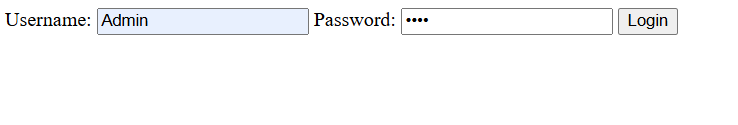

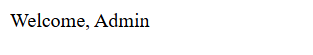

# **No data is shown in the URL.**

# **DELETE Request**



```
<?php
if ($_SERVER["REQUEST_METHOD"] === "POST" && $_POST['_method'] === 'DELETE') {
    $id = $_POST['id'];
    echo "User with ID $id has been deleted.";
} else {
    echo "Invalid request.";
}
?>

```





```
<form action="delete.php" method="POST">
    Enter User ID to Delete: <input type="text" name="id">
    <input type="hidden" name="_method" value="DELETE">
    <input type="submit" value="Delete User">
</form>

```



**✅ No data is shown in the URL.**

# **Handling PUT Request**

A PUT request updates entire records.



```
fetch('put.php', {
    method: 'PUT',
    headers: { 'Content-Type': 'application/json' },
    body: JSON.stringify({ id: 2, name: "Updated Name" })
})
.then(response => response.json())
.then(data => console.log(data))
.catch(error => console.error('Error:', error));

```





```
<?php
if ($_SERVER['REQUEST_METHOD'] === 'PUT') {
    parse_str(file_get_contents("php://input"), $data);
    
    if (isset($data['id']) && isset($data['name'])) {
        echo json_encode(["message" => "User ID " . $data['id'] . " updated to " . $data['name']]);
    } else {
        echo json_encode(["error" => "Invalid Data"]);
    }
} else {
    echo json_encode(["error" => "Invalid request method"]);
}
?>

```



# **✅ How it Works?**

JavaScript sends a PUT request with id and name.

PHP reads and processes the data.

A JSON response confirms the update.

# **Handling PATCH Request**

A PATCH request updates only specific fields.



```
fetch('patch.php', {
    method: 'PATCH',
    headers: { 'Content-Type': 'application/json' },
    body: JSON.stringify({ id: 3, email: "newemail@example.com" })
})
.then(response => response.json())
.then(data => console.log(data))
.catch(error => console.error('Error:', error));

```





```
<?php
if ($_SERVER['REQUEST_METHOD'] === 'PATCH') {
    parse_str(file_get_contents("php://input"), $data);
    
    if (isset($data['id']) && isset($data['email'])) {
        echo json_encode(["message" => "User ID " . $data['id'] . " email updated to " . $data['email']]);
    } else {
        echo json_encode(["error" => "Invalid Data"]);
    }
} else {
    echo json_encode(["error" => "Invalid request method"]);
}
?>

```



# **✅ How it Works?**

JavaScript sends a PATCH request with id and email.

PHP updates only the email field.

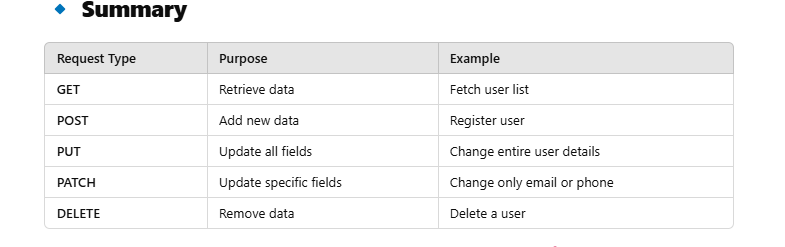

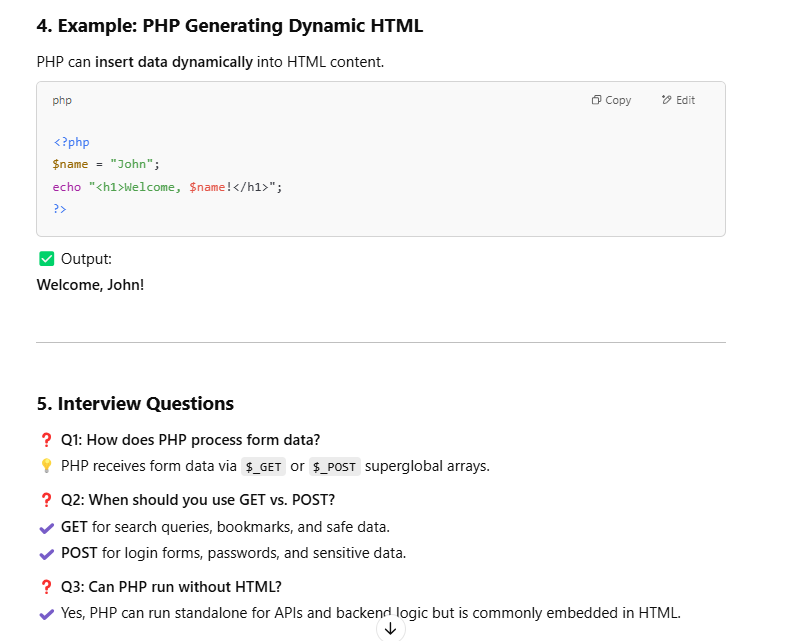

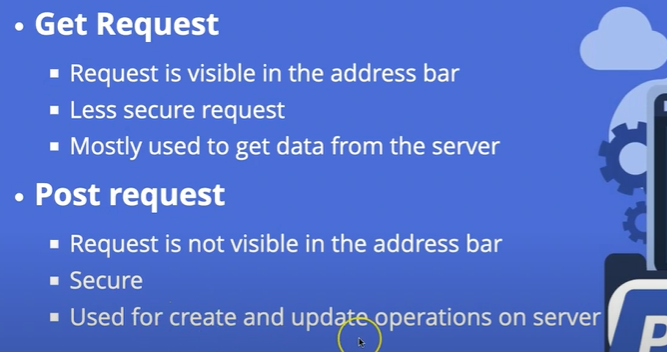